In [1]:
!pip install wordcloud pandas matplotlib

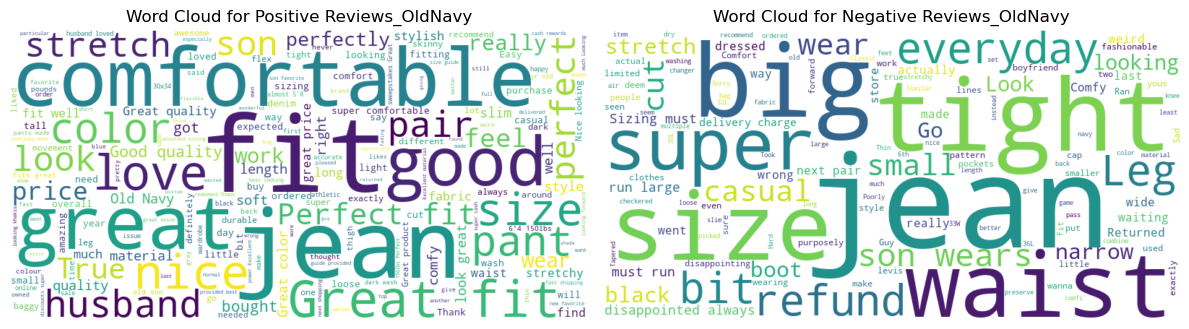

In [4]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the CSV file containing the reviews
file_path = 'old_navy.csv'
df = pd.read_csv(file_path)
df['Review'] = df['Review'].astype(str)

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review and create a new column
df['Sentiment'] = df['Review'].apply(analyze_sentiment)

# Separate positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].str.cat(sep=' ')
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].str.cat(sep=' ')

# Define stopwords (common words to exclude from the word cloud)
stopwords = set(STOPWORDS)

# Create WordCloud objects for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(negative_reviews)

# Display the word clouds for positive and negative reviews
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews_OldNavy')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews_OldNavy')
plt.axis('off')

plt.tight_layout()
plt.show()
